In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("social media influencers - instagram sep-2022.csv")

In [4]:
df.head()

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement\n,Engagement average\r\n,Category_1,Category_2
0,1,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling
2,3,arianagrande,Ariana Grande,329.6M,United States,2.9M,4M,NaN,NaN
3,4,leomessi,Leo Messi,358.6M,Indonesia,2.7M,3.5M,Sports with a ball,Family
4,5,zendaya,Zendaya,151.1M,United States,4.3M,5.8M,Cinema & Actors/actresses,Fashion


In [5]:
df.shape

(1050, 9)

In [6]:
df.columns

Index(['S.no', 'Instagram name', ' Name', 'Subscribers', 'Audience country',
       'Authentic engagement\n', 'Engagement average\r\n', 'Category_1',
       'Category_2'],
      dtype='object')

In [7]:
df.isnull().sum()

S.no                        0
Instagram name              0
 Name                      21
Subscribers                 0
Audience country            4
Authentic engagement\n      0
Engagement average\r\n      0
Category_1                248
Category_2                800
dtype: int64

From the previews information we see that tha name of the colums not clear and there is a a lot of null value in the category_1 and category_2

In [8]:
df.drop(["S.no"," Name", "Authentic engagement\n",'Category_2'], axis = 1, inplace = True)

In [9]:
df.rename(columns = {'Category_1':'Category','Audience country(mostly)':'Audience Country', 'Subscribers':'Followers','Engagement average\r\n':'Engagement average'}, inplace = True)
df.head()

,Instagram name,Followers,Audience country,Engagement average,Category
0,cristiano,477.9M,India,6.2M,Sports with a ball
1,kyliejenner,368.1M,United States,5.5M,Fashion
2,arianagrande,329.6M,United States,4M,NaN
3,leomessi,358.6M,Indonesia,3.5M,Sports with a ball
4,zendaya,151.1M,United States,5.8M,Cinema & Actors/actresses


In [10]:
df.drop_duplicates()
df.shape

(1050, 5)

**Start prosessing the data**:
cahnge the number for the Followers and Engagement avarage

In [11]:
print(df['Followers'].str[-1].unique())

['M']


In [12]:
df["Followers-2"]=df["Followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df["Engagement average-2"]=df["Engagement average"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [13]:
df.head()

,Instagram name,Followers,Audience country,Engagement average,Category,Followers-2,Engagement average-2
0,cristiano,477.9M,India,6.2M,Sports with a ball,477900000,6200000
1,kyliejenner,368.1M,United States,5.5M,Fashion,368100000,5500000
2,arianagrande,329.6M,United States,4M,NaN,329600000,4000000
3,leomessi,358.6M,Indonesia,3.5M,Sports with a ball,358600000,3500000
4,zendaya,151.1M,United States,5.8M,Cinema & Actors/actresses,151100000,5800000


**Top 10 influencers**

Text(0.5, 1.0, 'Top 10 influencers')

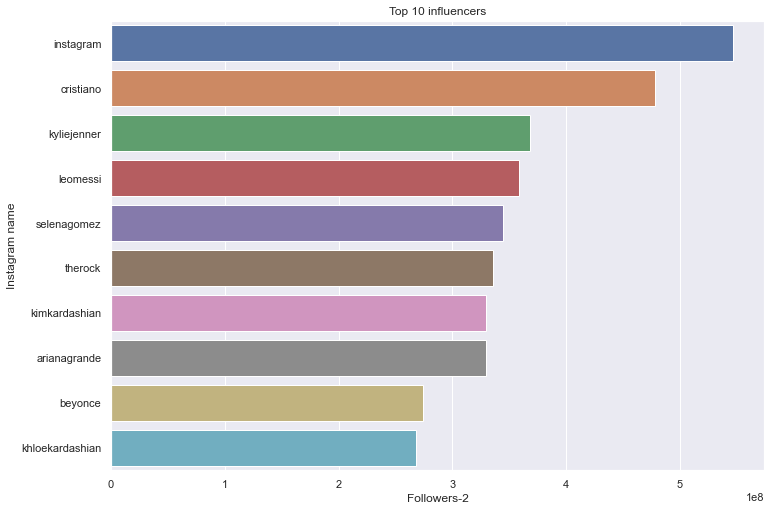

In [50]:

sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.barplot(y='Instagram name',x='Followers-2',data=df.sort_values(by='Followers-2',ascending=False).head(10)).set_title("Top 10 influencers")

**Top Audience country**

Text(0.5, 1.0, 'Top Audience country')

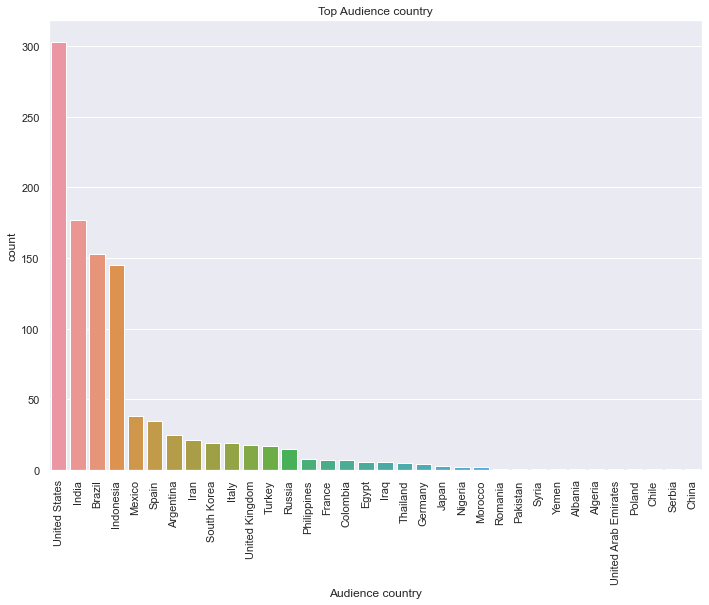

In [49]:

chart = sns.countplot(x="Audience country", data=df, order = df['Audience country'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
chart.set_title("Top Audience country")

**Top category**

Text(0.5, 1.0, 'Top category')

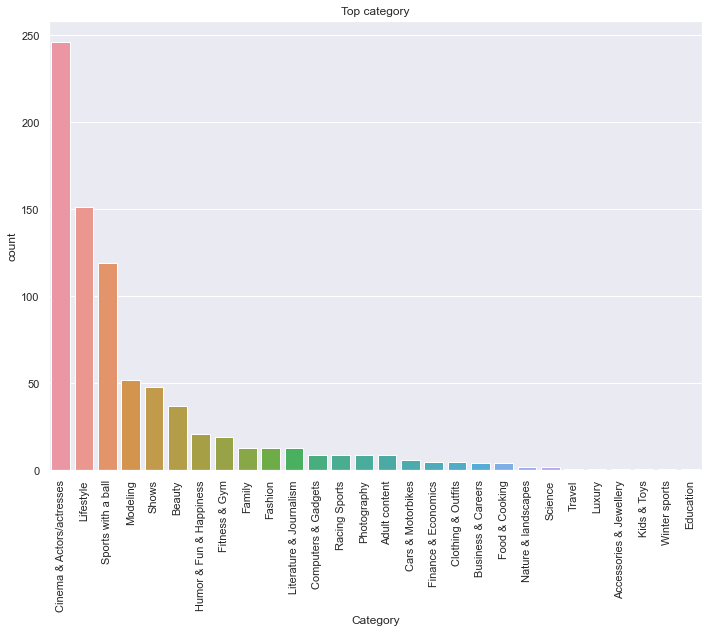

In [48]:
chart = sns.countplot(x="Category", data=df, order = df['Category'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
chart.set_title("Top category")

**Target country for a spicific category**

Text(0.5, 1.0, 'Top country in Beauty category')

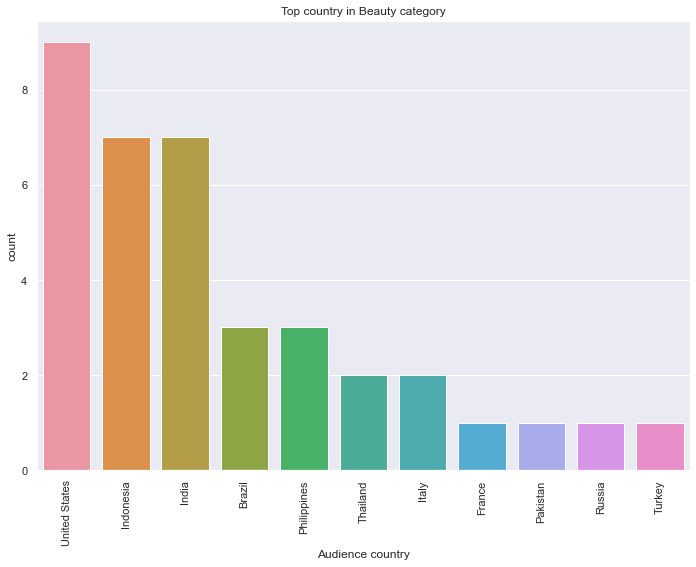

In [47]:
#Beauty
beauty=df[df['Category']=="Beauty"]
chart = sns.countplot(x='Audience country', data=beauty, order = beauty['Audience country'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
chart.set_title("Top country in Beauty category")

**Engagement Rate**

Engagement rates are metrics that track how actively involved with your content your audience is. Engaged consumers interact with brands through “likes” comments and social sharing. The engagement rate is a metric often used in analyzing the efficacy of brand campaigns.

Engagement rate is calculated as total engagement divided by total followers, multiplied by 100%.
The engagement rate formula is: Engagement Rate = Total Engagement / Total Followers x 100%

In [31]:
df['Engagement Rate']=np.round((df['Engagement average-2']/df['Followers-2'])*100,3)
df.head()

,Instagram name,Followers,Audience country,Engagement average,Category,Followers-2,Engagement average-2,Engagement Rate
0,cristiano,477.9M,India,6.2M,Sports with a ball,477900000,6200000,1.297
1,kyliejenner,368.1M,United States,5.5M,Fashion,368100000,5500000,1.494
2,arianagrande,329.6M,United States,4M,NaN,329600000,4000000,1.214
3,leomessi,358.6M,Indonesia,3.5M,Sports with a ball,358600000,3500000,0.976
4,zendaya,151.1M,United States,5.8M,Cinema & Actors/actresses,151100000,5800000,3.839


if you want to target mini influencers you can take a low followers with high ER 

In [32]:
#Beauty and fashion
beauty2=df[df['Category'].isin(['Lifestyle','Fashion','Beauty'])]
beauty2.head()

,Instagram name,Followers,Audience country,Engagement average,Category,Followers-2,Engagement average-2,Engagement Rate
1,kyliejenner,368.1M,United States,5.5M,Fashion,368100000,5500000,1.494
5,selenagomez,344.2M,United States,2.4M,Lifestyle,344200000,2400000,0.697
9,beyonce,274.1M,United States,2.1M,Fashion,274100000,2100000,0.766
10,kimkardashian,329.8M,United States,1.6M,Fashion,329800000,1600000,0.485
17,agustd,38.3M,South Korea,9.9M,Lifestyle,38300000,9900000,25.849


In [53]:
df1=beauty2[beauty2['Audience country']=="India"]
df1_mini=df1[df1['Followers-2']<6000000]
#df1_mini=df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category')
df1_mini.head()

,Instagram name,Followers,Audience country,Engagement average,Category,Followers-2,Engagement average-2,Engagement Rate
553,srinidhi_shetty,4.4M,India,1.1M,Beauty,4400000,1100000,25.000
832,dhanashree9,5.2M,India,525K,Lifestyle,5200000,525000,10.096


Text(0.5, 1.0, 'mini influencers in India in the category Lifestyle,Fashion,Beauty')

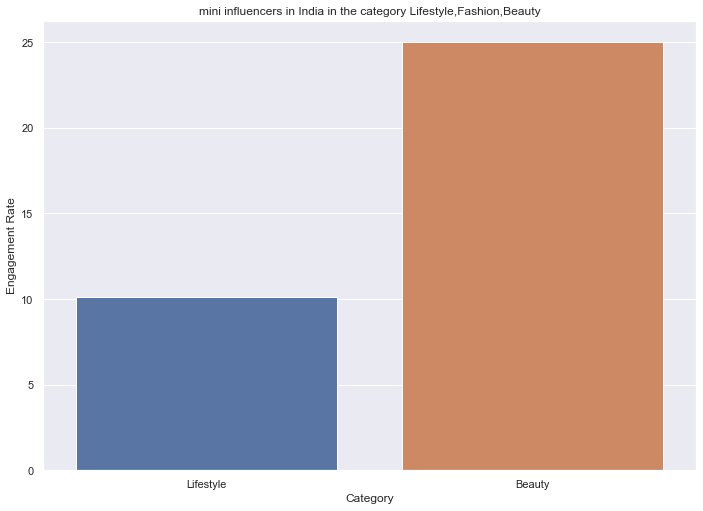

In [54]:
sns.barplot(x='Category',y='Engagement Rate',data=df1_mini.sort_values(by='Engagement Rate',ascending=True)).set_title('mini influencers in India in the category Lifestyle,Fashion,Beauty')

**we found that the ER in US is highest in the Lifestyle category with the mini influencers**